## Keras API Project Exercise

### The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

### NOTE: Do not download the full zip from the link! We provide a special version of this file that has some extra feature engineering for you to do. You won't be able to follow along with the original file!

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

#### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

In [478]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [479]:
data_info = pd.read_csv('DATA/lending_club_info.csv', index_col='LoanStatNew') 

In [480]:
data_info

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [481]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [482]:
feat_info('mort_acc')

Number of mortgage accounts.


In [483]:
df = pd.read_csv('DATA/lending_club_loan_two.csv')

In [484]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [485]:
df.head(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"


### Preprocessing

<AxesSubplot:>

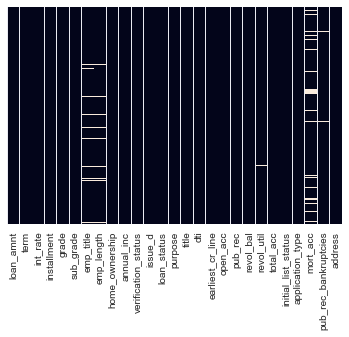

In [486]:
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)

In [487]:
feat_info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [488]:
pd.get_dummies(df['term'], drop_first=True)

,60 months
0,0
1,0
2,0
3,0
4,1
...,...
396025,1
396026,0
396027,0
396028,1


In [489]:
df['term'] = pd.get_dummies(df['term'], drop_first=True)[' 60 months']

In [490]:
feat_info('grade')

LC assigned loan grade


In [491]:
df['grade'].value_counts()

B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: grade, dtype: int64

In [492]:
pd.get_dummies(df['grade'], drop_first=True).head(2)

,B,C,D,E,F,G
0,1,0,0,0,0,0
1,1,0,0,0,0,0


In [493]:
df.head(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,0,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,0,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"


In [494]:
df = pd.concat([df, pd.get_dummies(df['grade'], drop_first=True)], axis=1)

In [495]:
df.drop('grade', axis=1, inplace=True)

In [496]:
df.head(1)

,loan_amnt,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,application_type,mort_acc,pub_rec_bankruptcies,address,B,C,D,E,F,G
0,10000.0,0,11.44,329.48,B4,Marketing,10+ years,RENT,117000.0,Not Verified,...,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1,0,0,0,0,0


In [497]:
feat_info('sub_grade')

LC assigned loan subgrade


In [498]:
df['sub_grade'].nunique()

35

In [499]:
df.drop('sub_grade', axis=1, inplace=True)

In [500]:
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [501]:
df['emp_title'].value_counts()

Teacher                                4389
Manager                                4250
Registered Nurse                       1856
RN                                     1846
Supervisor                             1830
                                       ... 
Lujack's Auto Plaza                       1
Support manager                           1
Principal Service Strategy Advisor        1
Web Manager & Digital Media Manager       1
Import Logistics Director                 1
Name: emp_title, Length: 173105, dtype: int64

In [502]:
df.drop('emp_title', axis=1, inplace=True)

In [503]:
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [504]:
df['emp_length'].value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

In [505]:
x = np.nan

In [506]:
x is np.nan

True

In [507]:
df[df['emp_length'].isnull() == True]['emp_length'].iloc[0]

nan

In [508]:
def emp_years(x):
    if x is np.nan:
        return 0;
    first_char = x[0]
    second_char = x[1]
    if first_char == '<':
        return 0;
    elif first_char == '1' and second_char == '0':
        return 10;
    else: 
        return int(first_char);

In [509]:
df['emp_length']

0         10+ years
1           4 years
2          < 1 year
3           6 years
4           9 years
            ...    
396025      2 years
396026      5 years
396027    10+ years
396028    10+ years
396029    10+ years
Name: emp_length, Length: 396030, dtype: object

In [510]:
emp_years(df['emp_length'].iloc[3])

6

In [511]:
df['emp_length'].apply(emp_years)

0         10
1          4
2          0
3          6
4          9
          ..
396025     2
396026     5
396027    10
396028    10
396029    10
Name: emp_length, Length: 396030, dtype: int64

In [512]:
df['emp_length'] = df['emp_length'].apply(emp_years)

In [513]:
df.head(1)

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,application_type,mort_acc,pub_rec_bankruptcies,address,B,C,D,E,F,G
0,10000.0,0,11.44,329.48,10,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,...,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1,0,0,0,0,0


In [514]:
feat_info('home_ownership')

The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER


In [515]:
df['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [516]:
def ownership(x):
    if x == 'NONE' or x == 'ANY':
        return 'OTHER'
    else:
        return x

In [517]:
df['home_ownership'].apply(ownership).value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: home_ownership, dtype: int64

In [518]:
pd.get_dummies(df['home_ownership'].apply(ownership), drop_first=True)

,OTHER,OWN,RENT
0,0,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,0,0,0
...,...,...,...
396025,0,0,1
396026,0,0,0
396027,0,0,1
396028,0,0,0


In [519]:
df = pd.concat([df, pd.get_dummies(df['home_ownership'].apply(ownership), drop_first=True)], axis=1)

In [520]:
df.drop('home_ownership', axis=1, inplace=True)

In [521]:
df.head(1)

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,verification_status,issue_d,loan_status,purpose,...,address,B,C,D,E,F,G,OTHER,OWN,RENT
0,10000.0,0,11.44,329.48,10,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,...,"0174 Michelle Gateway\nMendozaberg, OK 22690",1,0,0,0,0,0,0,0,1


In [522]:
pd.get_dummies(df['verification_status'], drop_first=True)

,Source Verified,Verified
0,0,0
1,0,0
2,1,0
3,0,0
4,0,1
...,...,...
396025,1,0
396026,1,0
396027,0,1
396028,0,1


In [523]:
df = pd.concat([df, pd.get_dummies(pd.get_dummies(df['verification_status'], drop_first=True), drop_first=True)], axis=1)

In [524]:
df.drop('verification_status', axis=1, inplace=True)
df.head(1)

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,issue_d,loan_status,purpose,title,...,C,D,E,F,G,OTHER,OWN,RENT,Source Verified,Verified
0,10000.0,0,11.44,329.48,10,117000.0,Jan-2015,Fully Paid,vacation,Vacation,...,0,0,0,0,0,0,0,1,0,0


In [525]:
feat_info('issue_d')

The month which the loan was funded


In [526]:
df.drop('issue_d', axis=1, inplace=True)
df.head(1)

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,loan_status,purpose,title,dti,...,C,D,E,F,G,OTHER,OWN,RENT,Source Verified,Verified
0,10000.0,0,11.44,329.48,10,117000.0,Fully Paid,vacation,Vacation,26.24,...,0,0,0,0,0,0,0,1,0,0


In [527]:
y = pd.get_dummies(df['loan_status'], drop_first=True)
y

,Fully Paid
0,1
1,1
2,1
3,1
4,0
...,...
396025,1
396026,1
396027,1
396028,1


In [528]:
df.drop('loan_status', axis=1, inplace=True)

In [529]:
df.head(1)

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,purpose,title,dti,earliest_cr_line,...,C,D,E,F,G,OTHER,OWN,RENT,Source Verified,Verified
0,10000.0,0,11.44,329.48,10,117000.0,vacation,Vacation,26.24,Jun-1990,...,0,0,0,0,0,0,0,1,0,0


In [530]:
df.drop('purpose', axis=1, inplace=True)

In [531]:
df.drop('title', axis=1, inplace=True)

In [532]:
df.head(1)

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,...,C,D,E,F,G,OTHER,OWN,RENT,Source Verified,Verified
0,10000.0,0,11.44,329.48,10,117000.0,26.24,Jun-1990,16.0,0.0,...,0,0,0,0,0,0,0,1,0,0


In [533]:
feat_info('dti')

A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.


In [534]:
df['dti']

0         26.24
1         22.05
2         12.79
3          2.60
4         33.95
          ...  
396025    15.63
396026    21.45
396027    17.56
396028    15.88
396029     8.32
Name: dti, Length: 396030, dtype: float64

In [535]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [536]:
df.drop('earliest_cr_line', axis=1, inplace=True)

In [537]:
feat_info('open_acc')

The number of open credit lines in the borrower's credit file.


<AxesSubplot:>

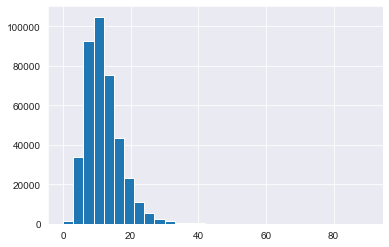

In [538]:
sns.set_style('darkgrid')
df['open_acc'].hist(bins=30)

In [539]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'B', 'C', 'D', 'E', 'F', 'G',
       'OTHER', 'OWN', 'RENT', 'Source Verified', 'Verified'],
      dtype='object')

In [540]:
feat_info('pub_rec')

Number of derogatory public records


In [541]:
df['pub_rec'].value_counts()

0.0     338272
1.0      49739
2.0       5476
3.0       1521
4.0        527
5.0        237
6.0        122
7.0         56
8.0         34
9.0         12
10.0        11
11.0         8
13.0         4
12.0         4
19.0         2
86.0         1
40.0         1
17.0         1
15.0         1
24.0         1
Name: pub_rec, dtype: int64

In [542]:
feat_info('revol_bal')

Total credit revolving balance


In [543]:
df['revol_bal']

0         36369.0
1         20131.0
2         11987.0
3          5472.0
4         24584.0
           ...   
396025     1990.0
396026    43263.0
396027    32704.0
396028    15704.0
396029     4292.0
Name: revol_bal, Length: 396030, dtype: float64

In [544]:
feat_info('revol_util')

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


(0.0, 150.0)

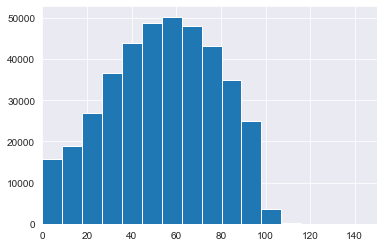

In [545]:
df['revol_util'].hist(bins=100)
plt.xlim([0,150])

In [546]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'B', 'C', 'D', 'E', 'F', 'G',
       'OTHER', 'OWN', 'RENT', 'Source Verified', 'Verified'],
      dtype='object')

In [547]:
feat_info('total_acc')

The total number of credit lines currently in the borrower's credit file


In [548]:
feat_info('open_acc')

The number of open credit lines in the borrower's credit file.


<AxesSubplot:>

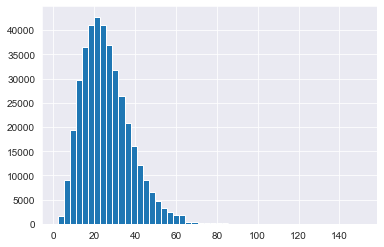

In [549]:
df['total_acc'].hist(bins=50)

In [550]:
feat_info('initial_list_status')

The initial listing status of the loan. Possible values are – W, F


In [551]:
df['initial_list_status'].value_counts()

f    238066
w    157964
Name: initial_list_status, dtype: int64

In [552]:
pd.get_dummies(df['initial_list_status'], drop_first=True)

,w
0,1
1,0
2,0
3,0
4,0
...,...
396025,1
396026,0
396027,0
396028,0


In [553]:
df['initial_list_status'] = pd.get_dummies(df['initial_list_status'], drop_first=True)

In [554]:
feat_info('application_type')

Indicates whether the loan is an individual application or a joint application with two co-borrowers


In [555]:
df['application_type'].value_counts()

INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [556]:
df.drop('application_type', axis=1, inplace=True)

In [557]:
feat_info('mort_acc')

Number of mortgage accounts.


<AxesSubplot:>

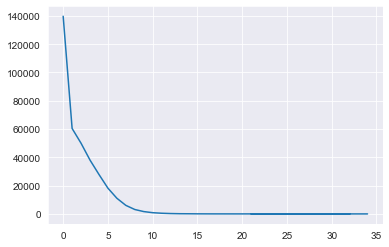

In [558]:
df['mort_acc'].value_counts().plot()

In [559]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'mort_acc', 'pub_rec_bankruptcies',
       'address', 'B', 'C', 'D', 'E', 'F', 'G', 'OTHER', 'OWN', 'RENT',
       'Source Verified', 'Verified'],
      dtype='object')

In [560]:
feat_info('pub_rec_bankruptcies')

Number of public record bankruptcies


In [561]:
df['pub_rec_bankruptcies'].value_counts()

0.0    350380
1.0     42790
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: pub_rec_bankruptcies, dtype: int64

In [562]:
df['pub_rec_bankruptcies'].isnull().value_counts()

False    395495
True        535
Name: pub_rec_bankruptcies, dtype: int64

In [563]:
df['pub_rec_bankruptcies'].fillna(0,inplace=True)

In [564]:
df['pub_rec_bankruptcies'].isnull().value_counts()

False    396030
Name: pub_rec_bankruptcies, dtype: int64

In [565]:
df['pub_rec_bankruptcies'].apply(lambda x: x if x == 0 else 1)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
396025    0.0
396026    0.0
396027    0.0
396028    0.0
396029    0.0
Name: pub_rec_bankruptcies, Length: 396030, dtype: float64

In [566]:
df['pub_rec_bankruptcies'].apply(lambda x: x if x == 0 else 1).value_counts()

0.0    350915
1.0     45115
Name: pub_rec_bankruptcies, dtype: int64

In [567]:
df['bankrupt'] = df['pub_rec_bankruptcies'].apply(lambda x: x if x == 0 else 1)

In [568]:
df.drop('pub_rec_bankruptcies', axis=1, inplace=True)

In [569]:
df['mort_acc'].isnull().value_counts()

False    358235
True      37795
Name: mort_acc, dtype: int64

In [570]:
feat_info('mort_acc')

Number of mortgage accounts.


In [571]:
df['mort_acc'].mean()

1.8139908160844138

In [572]:
df['mort_acc'].fillna(df['mort_acc'].mean(), inplace=True)

In [573]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'mort_acc', 'address', 'B', 'C',
       'D', 'E', 'F', 'G', 'OTHER', 'OWN', 'RENT', 'Source Verified',
       'Verified', 'bankrupt'],
      dtype='object')

In [574]:
df.drop('address', axis=1, inplace=True)

<AxesSubplot:>

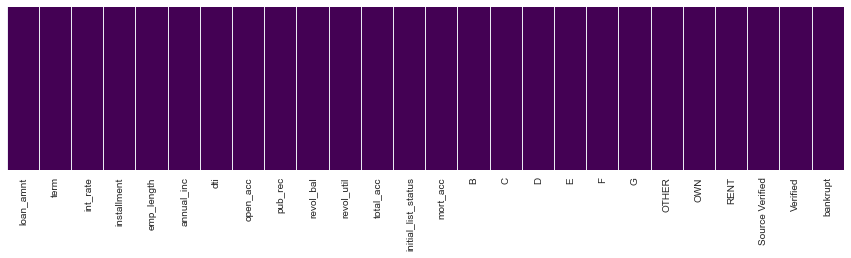

In [575]:
plt.figure(figsize=(15,3))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [576]:
X = df

In [577]:
X = X.values
y = y.values

In [578]:
from sklearn.model_selection import train_test_split

In [579]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Creating the model

In [580]:
from sklearn.preprocessing import MinMaxScaler

In [581]:
scaler = MinMaxScaler()

In [582]:
scaler.fit(X_train)

MinMaxScaler()

In [583]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)